<a href="https://colab.research.google.com/github/sauravakolia/OSIC-Pulmonary-/blob/master/OSIC(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
!pip install fastai2 -q

     |████████████████████████████████| 184kB 8.9MB/s 


In [9]:
!pip install pydicom 
!pip install kornia 

     |████████████████████████████████| 35.5MB 89kB/s 
     |████████████████████████████████| 204kB 7.6MB/s 


In [10]:
# !wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:79.0) Gecko/20100101 Firefox/79.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/20604/1357052/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597511821&Signature=dyy0%2Bec1zK4y%2FsVbotItGlfKVRIs0rbxjmXK5PL4wCbRx0mPni0HKYpIfFwCyu12%2FZ8xfQVg2hT%2FVTm6yirHezpdO6K%2BB5PJPuJDwjZTA15qJhEpNSiB%2BEYBdr3%2BBr92kQtCy1nQ3vw8pZ7jAnwXC7PD6Fh9%2BlrPUXaG83%2BJ8enJN9gGwP2wrSr4vnlMYRCNFbDFbjCuxhZ4LrLblhsvm%2B2i6MjdE5ykRhoxMGr%2Fss8L8zrUaDbfN75wjlmYgW8SisX2a0%2FS8OVf%2FPAb%2BeLgX63kiIQHSbGGjNcggcAA2eHVcTbM%2BXqks7FUIK9YjWpWw8rpuaN8Y7XS3hXI69sRGQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dosic-pulmonary-fibrosis-progression.zip' --output-document 'osic-pulmonary-fibrosis-progression.zip'

In [11]:


################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-08-15 17:01:11--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   281MB/s    in 0.3s    

2020-08-15 17:01:12 (281 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [12]:
!conda install gdcm -c conda-forge -y 

Solving environment: \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - gdcm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    conda-4.8.4                |   py37hc8dfbb8_2         3.1 MB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    gdcm-2.8.9                 |   py37h71b2a6d_0         3.4 MB  conda-forge
    jpeg-9d                    |       h516909a_0         266 KB  conda-forge
    json-c-0.13.1              |    hbfbb72e_1002         

In [13]:
import gdcm
import pydicom

In [14]:
%cd "/content/drive/My Drive/Colab Data"

/content/drive/My Drive/Colab Data


In [15]:
# %mkdir 'OSIC'

In [16]:
%cd "OSIC"

/content/drive/My Drive/Colab Data/OSIC


In [17]:
# import os
# import zipfile

# local_zip = '/content/osic-pulmonary-fibrosis-progression.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall()
# zip_ref.close()


In [18]:
# !rm /content/osic-pulmonary-fibrosis-progression.zip

In [19]:
from fastai2.basics           import *
from fastai2.medical.imaging  import *

In [20]:
import numpy as np 
import pandas as pd 
import pydicom as dcm
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns 
p = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


12


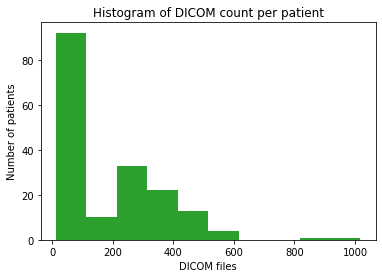

In [21]:
patient_sizes = [len(os.listdir('train/' + d)) for d in os.listdir('train')]
print(min(patient_sizes))
plt.hist(patient_sizes, color=p[2])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient');

*Therefore their are lots of patients with dicom files<100*

**Train data**

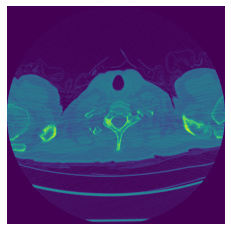

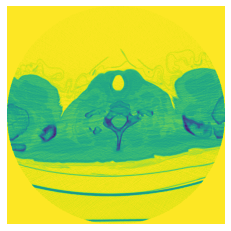

In [23]:
r = dcm.dcmread('train/ID00007637202177411956430/1.dcm')
img = r.pixel_array
img[img == -2000] = 0

plt.axis('off')
plt.imshow(img)
plt.show()

plt.axis('off')
plt.imshow(-img) # Invert colors with -
plt.show()

 DICOM file Information

In [24]:
dataset = dcm.dcmread('train/ID00007637202177411956430/1.dcm')

In [25]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.12297650151329871895440507938349160734
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.12297650151329871895440507938349160734
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) 

(array([ 55772.,      0.,      0.,      0., 109225.,  26065.,  63976.,
          4950.,   1814.,    342.]),
 array([-2000. , -1515.8, -1031.6,  -547.4,   -63.2,   421. ,   905.2,
         1389.4,  1873.6,  2357.8,  2842. ], dtype=float32),
 <a list of 10 Patch objects>)

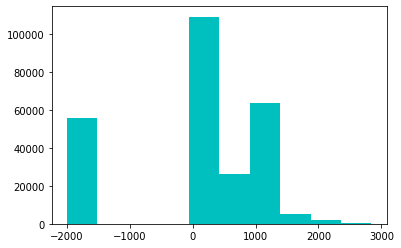

In [26]:
px = dataset.pixels.flatten()
plt.hist(px, color='c')

In [27]:
tensor_dicom = pixels(dataset) #convert into tensor

print(f'RescaleIntercept: {dataset.RescaleIntercept:1f}\nRescaleSlope: {dataset.RescaleSlope:1f}\nMax pixel: '
      f'{tensor_dicom.max()}\nMin pixel: {tensor_dicom.min()}\nShape: {tensor_dicom.shape}')


RescaleIntercept: -1024.000000
RescaleSlope: 1.000000
Max pixel: 2842.0
Min pixel: -2000.0
Shape: torch.Size([512, 512])


Converting the pixel value according to Household Unit
rescaled pixel = pixel * RescaleSlope + RescaleIntercept

(array([ 55772.,      0.,      0.,      0., 109225.,  26065.,  63976.,
          4950.,   1814.,    342.]),
 array([-3024. , -2539.8, -2055.6, -1571.4, -1087.2,  -603. ,  -118.8,
          365.4,   849.6,  1333.8,  1818. ], dtype=float32),
 <a list of 10 Patch objects>)

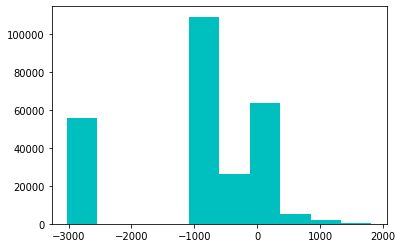

In [28]:
tensor_dicom_scaled = scaled_px(dataset) #convert into tensor taking RescaleIntercept and RescaleSlope into consideration
plt.hist(tensor_dicom_scaled.flatten(), color='c')


In [29]:
print(f'Max pixel: {tensor_dicom_scaled.max()}\nMin pixel: {tensor_dicom_scaled.min()}')


Max pixel: 1818.0
Min pixel: -3024.0


Looking at various densities

Looking at the bones +300 HUs



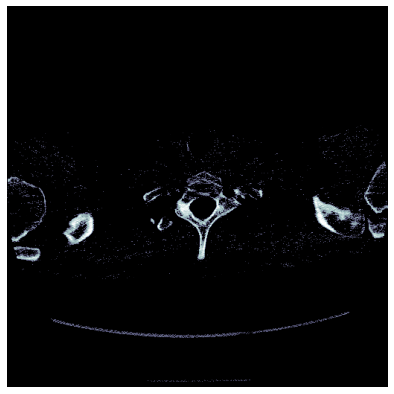

In [30]:
dataset.show(max_px=None, min_px=300, figsize=(7,7))


Looking at the water based areas 0 HUs



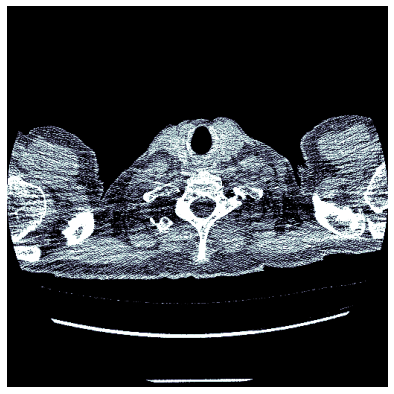

In [31]:
dataset.show(max_px=100, min_px=-100, figsize=(7,7))


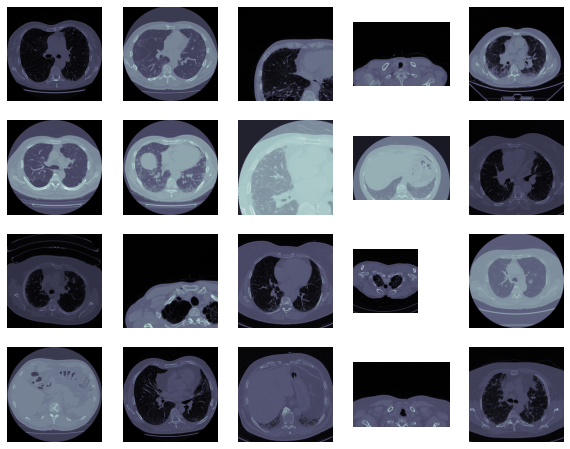

In [32]:
files = glob.glob('train/*/*.dcm')
def dicom_to_image(filename):
    im = dcm.dcmread(filename)
    img = im.pixel_array
    img[img == -2000] = 0
    return img
f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
for i in range(20):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

*ALL DICCOM Images of a patient*

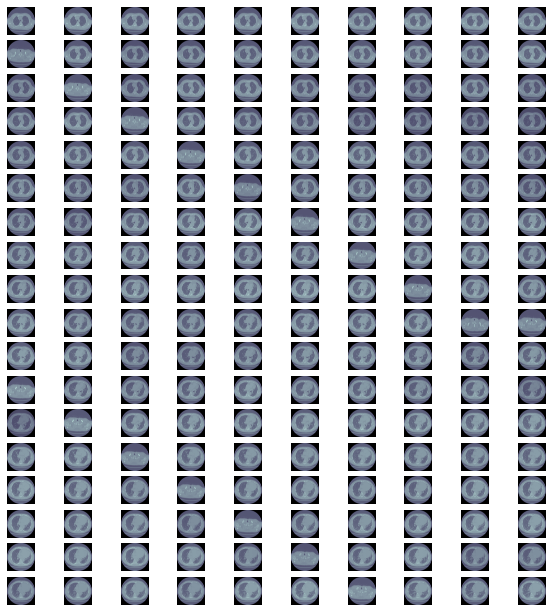

In [33]:
f, plots = plt.subplots(18, 10, sharex='all', sharey='all', figsize=(10, 11))
pat = glob.glob('train/ID00422637202311677017371/*.dcm')
for i in range(180):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(dcm.dcmread(pat[i]).pixel_array, cmap=plt.cm.bone)

This patient in particular has 423 slices (which is quite a lot) and we have indexed on only a few of these samples. All of this patient's slices are circular.

USING fastai.medical

Now We use "systematic windowing" which was previously used by radiologists with regards to the brain and fastai provide various windowing techniques.

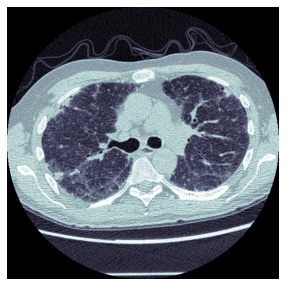

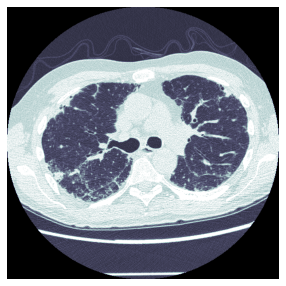

In [34]:
fn = Path('train/ID00007637202177411956430/')
fname = Path('train/ID00007637202177411956430/13.dcm')
dcom = fname.dcmread()
dcom.show()
dcom.show(scale=dicom_windows.lungs)

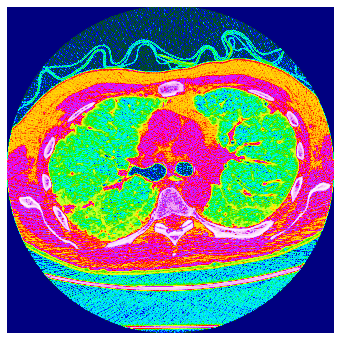

In [36]:
dcom.show(cmap=plt.cm.gist_ncar, figsize=(6,6))

The turbo colormap exposes the amount of empty space that we have in the image.

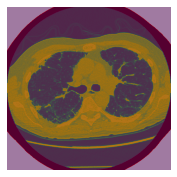

In [37]:
mask = dcom.mask_from_blur(dicom_windows.lungs)
wind = dcom.windowed(*dicom_windows.lungs)

_,ax = subplots(1,1)
show_image(wind, ax=ax[0])
show_image(mask, alpha=0.5, cmap=plt.cm.Reds, ax=ax[0]);

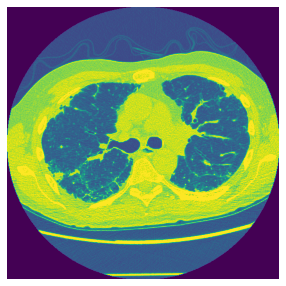

In [38]:
bbs = mask2bbox(mask)
lo,hi = bbs
show_image(wind[lo[0]:hi[0],lo[1]:hi[1]]);

Now we can isolate the lungs from the empty space.


In [39]:
path = Path('train/ID00007637202177411956430/')
def fix_pxrepr(dcm):
    if dcm.PixelRepresentation != 0 or dcm.RescaleIntercept<-100: return
    x = dcm.pixel_array + 1000
    px_mode = 4096
    x[x>=px_mode] = x[x>=px_mode] - px_mode
    dcm.PixelData = x.tobytes()
    dcm.RescaleIntercept = -1000



The above basically just fixes up the pixel representation attribute of the DICOM file for us to use.


In [40]:
def dcm_tfm(fn): 
    fn = (path/fn).with_suffix('.dcm')
    try:
        x = fn.dcmread()
        fix_pxrepr(x)
    except Exception as e:
        pass
    if x.Rows != 512 or x.Columns != 512: x.zoom_to((512,512))
    px = x.scaled_px
    return TensorImage(px.to_3chan(dicom_windows.lungs,dicom_windows.subdural, bins=None))

This basically reads in a DICOM file, fixes up its pixel representation attribute  and it then returns a Tensor image

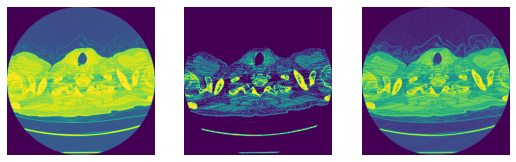

In [41]:
show_images(dcm_tfm('2'))



The above is basically just our earlier image in Tensor format for a neural network to utilize.


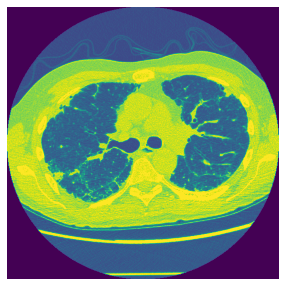

In [42]:
px = dcom.windowed(*dicom_windows.lungs)
show_image(px);

This crops out the above neatly to leave just the lungs remaining right where we want them. However

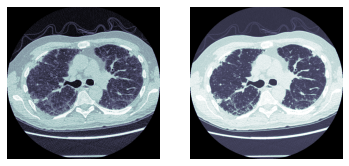

In [43]:
_,axs = subplots(1,2)
dcom.show(ax=axs[0]);   dcom.show(dicom_windows.lungs, ax=axs[1])

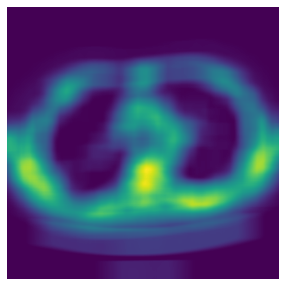

In [44]:
gdcm = gauss_blur2d(dcom.windowed(*dicom_windows.brain), 100) # using the brain for visualization purposes
show_image(gdcm);

Now take the segment from the blurr image


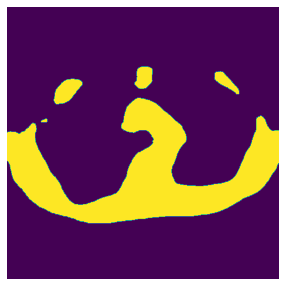

In [45]:
show_image(gdcm>0.3);

Now converting the diccom file to dataframe

In [46]:
df = pd.DataFrame.from_dicoms(fn.ls())
df.head()

,SpecificCharacterSet,ImageType,SOPInstanceUID,Modality,Manufacturer,ManufacturerModelName,PatientName,PatientID,PatientSex,DeidentificationMethod,BodyPartExamined,SliceThickness,KVP,DistanceSourceToDetector,DistanceSourceToPatient,GantryDetectorTilt,TableHeight,RotationDirection,XRayTubeCurrent,GeneratorPower,FocalSpots,ConvolutionKernel,PatientPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,InstanceNumber,ImagePositionPatient,ImageOrientationPatient,FrameOfReferenceUID,PositionReferenceIndicator,SliceLocation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,PixelPaddingValue,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,RescaleType,fname,MultiImageType,ImageType1,ImageType2,MultiImagePositionPatient,ImagePositionPatient1,ImagePositionPatient2,MultiImageOrientationPatient,ImageOrientationPatient1,ImageOrientationPatient2,ImageOrientationPatient3,ImageOrientationPatient4,ImageOrientationPatient5,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,ORIGINAL,2.25.12297650151329871895440507938349160734,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,1,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-69.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/ID00007637202177411956430/1.dcm,1,PRIMARY,AXIAL,1,-153.5,-69.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2842,-1.454884,1137.488858,0.058094
1,ISO_IR 100,ORIGINAL,2.25.37611372879908126511187998276199853341,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,10,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-159.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/ID00007637202177411956430/10.dcm,1,PRIMARY,AXIAL,1,-153.5,-159.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2918,19.038597,1138.876560,0.068130
2,ISO_IR 100,ORIGINAL,2.25.85307440096263309601052352542310417307,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,11,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-169.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/ID00007637202177411956430/11.dcm,1,PRIMARY,AXIAL,1,-153.5,-169.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2976,27.237549,1146.816206,0.064548
3,ISO_IR 100,ORIGINAL,2.25.46123781426224593247761081441512910006,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,12,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-179.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/ID00007637202177411956430/12.dcm,1,PRIMARY,AXIAL,1,-153.5,-179.75,1,0.0,0.0,0.0,1.0,0.0,1,0.652344,-2000,2862,31.026043,1142.850763,0.069099
4,ISO_IR 100,ORIGINAL,2.25.116080798158038264329904205296840554047,CT,GE MEDICAL SYSTEMS,LightSpeed VCT,ID00007637202177411956430,ID00007637202177411956430,,Table;,Chest,1.25,120.0,949.075012,541.0,0.0,130.0,CW,79,9600,0.7,BONE,FFS,2.25.80896671862726099888461805953012988790,2.25.51769600465874599901723496946193454321,,13,-158.7,1.0,2.25.64058019325784235774105718339367403144,SN,-189.75,1,MONOCHROME2,512,512,0.652344,16,16,15,1,-2000,-500.0,-1500.0,-1024.0,1.0,HU,train/

In [47]:
# !pip install pydicom

In [48]:
import copy
from datetime import timedelta, datetime
import imageio
import matplotlib.pyplot as plt
from matplotlib import cm
import multiprocessing
import numpy as np
import os
from pathlib import Path
import pydicom
import pytest
import scipy.ndimage as ndimage
from scipy.ndimage.interpolation import zoom
from skimage import measure, morphology, segmentation
from time import time, sleep
from tqdm import trange, tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, random_split, DistributedSampler, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
import warnings

In [49]:
root_dir = '/content/drive/My Drive/Colab Data/OSIC/train'
test_dir = '/content/drive/My Drive/Colab Data/OSIC/test'
# model_file = '/kaggle/working/diophantus.pt'
resize_dims = (40, 256, 256)
clip_bounds = (-1000, 200)
watershed_iterations = 1
pre_calculated_mean = 0.02865046213070556
latent_features = 10
batch_size = 16
learning_rate = 3e-03
num_epochs = 15
val_size = 0.2
tensorboard_dir = '/content/drive/My Drive/Colab Data/OSIC/model'
%mkdir model

mkdir: cannot create directory ‘model’: File exists



3. Dataset interface


3.1. ctscans_dataset.py

This interface ingests the data from the 3D CT scans, porting them to a PyTorch Dataset

In [50]:
class CTScansDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = Path(root_dir)
        self.patients = [p for p in self.root_dir.glob('*') if p.is_dir()]
        self.transform = transform

    def __len__(self):
        return len(self.patients)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        image, metadata = self.load_scan(self.patients[idx])
        sample = {'image': image, 'metadata': metadata}
        if self.transform:
            sample = self.transform(sample)

        return sample

    def save(self, path):
        t0 = time()
        Path(path).mkdir(exist_ok=True, parents=True)
        print('Saving pre-processed dataset to disk')
        sleep(1)
        cum = 0

        bar = trange(len(self))
        for i in bar:
            sample = self[i]
            image, data = sample['image'], sample['metadata']
            cum += torch.mean(image).item()

            bar.set_description(f'Saving CT scan {data.PatientID}')
            fname = Path(path) / f'{data.PatientID}.pt'
            torch.save(image, fname)

        sleep(1)
        bar.close()
        print(f'Done! Time {timedelta(seconds=time() - t0)}\n'
              f'Mean value: {cum / len(self)}')

    def get_patient(self, patient_id):
        patient_ids = [str(p.stem) for p in self.patients]
        return self.__getitem__(patient_ids.index(patient_id))

    @staticmethod
    def load_scan(path):
        slices = [pydicom.read_file(p) for p in path.glob('*.dcm')]
        try:
            slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))
        except AttributeError:
            warnings.warn(f'Patient {slices[0].PatientID} CT scan does not '
                          f'have "ImagePositionPatient". Assuming filenames '
                          f'in the right scan order.')

        image = np.stack([s.pixel_array.astype(float) for s in slices])
        return image, slices[0]

3.2. Pre-processing

There are some pre-processing to be done. Let's tackle them one step at a time.

3.2.1. crop_bounding_box.py

In [51]:
class CropBoundingBox:
    @staticmethod
    def bounding_box(img3d: np.array):
        mid_img = img3d[int(img3d.shape[0] / 2)]
        same_first_row = (mid_img[0, :] == mid_img[0, 0]).all()
        same_first_col = (mid_img[:, 0] == mid_img[0, 0]).all()
        if same_first_col and same_first_row:
            return True
        else:
            return False

    def __call__(self, sample):
        image, data = sample['image'], sample['metadata']
        if not self.bounding_box(image):
            return sample

        mid_img = image[int(image.shape[0] / 2)]
        r_min, r_max = None, None
        c_min, c_max = None, None
        for row in range(mid_img.shape[0]):
            if not (mid_img[row, :] == mid_img[0, 0]).all() and r_min is None:
                r_min = row
            if (mid_img[row, :] == mid_img[0, 0]).all() and r_max is None \
                    and r_min is not None:
                r_max = row
                break

        for col in range(mid_img.shape[1]):
            if not (mid_img[:, col] == mid_img[0, 0]).all() and c_min is None:
                c_min = col
            if (mid_img[:, col] == mid_img[0, 0]).all() and c_max is None \
                    and c_min is not None:
                c_max = col
                break

        image = image[:, r_min:r_max, c_min:c_max]
        return {'image': image, 'metadata': data}


3.2.2. convert_to_hu.py

In [52]:
class ConvertToHU:
    def __call__(self, sample):
        image, data = sample['image'], sample['metadata']

        img_type = data.ImageType
        is_hu = img_type[0] == 'ORIGINAL' and not (img_type[2] == 'LOCALIZER')
        # if not is_hu:
        #     warnings.warn(f'Patient {data.PatientID} CT Scan not cannot be'
        #                   f'converted to Hounsfield Units (HU).')

        intercept = data.RescaleIntercept
        slope = data.RescaleSlope
        image = (image * slope + intercept).astype(np.int16)
        return {'image': image, 'metadata': data}


3.2.3. resize.py


In [53]:
class Resize:
    def __init__(self, output_size):
        assert isinstance(output_size, tuple)
        self.output_size = output_size

    def __call__(self, sample):
        image, data = sample['image'], sample['metadata']
        resize_factor = np.array(self.output_size) / np.array(image.shape)
        image = zoom(image, resize_factor, mode='nearest')
        return {'image': image, 'metadata': data}

clip.py

In [54]:
class Clip:
    def __init__(self, bounds=(-1000, 500)):
        self.min = min(bounds)
        self.max = max(bounds)

    def __call__(self, sample):
        image, data = sample['image'], sample['metadata']
        image[image < self.min] = self.min
        image[image > self.max] = self.max
        return {'image': image, 'metadata': data}

mask_watershed.py

In [55]:
class MaskWatershed:
    def __init__(self, min_hu, iterations, show_tqdm):
        self.min_hu = min_hu
        self.iterations = iterations
        self.show_tqdm = show_tqdm

    def __call__(self, sample):
        image, data = sample['image'], sample['metadata']

        stack = []
        if self.show_tqdm:
            bar = trange(image.shape[0])
            bar.set_description(f'Masking CT scan {data.PatientID}')
        else:
            bar = range(image.shape[0])
        for slice_idx in bar:
            sliced = image[slice_idx]
            stack.append(self.seperate_lungs(sliced, self.min_hu,
                                             self.iterations))

        return {
            'image': np.stack(stack),
            'metadata': sample['metadata']
        }

    @staticmethod
    def seperate_lungs(image, min_hu, iterations):
        h, w = image.shape[0], image.shape[1]

        marker_internal, marker_external, marker_watershed = MaskWatershed.generate_markers(image)

        # Sobel-Gradient
        sobel_filtered_dx = ndimage.sobel(image, 1)
        sobel_filtered_dy = ndimage.sobel(image, 0)
        sobel_gradient = np.hypot(sobel_filtered_dx, sobel_filtered_dy)
        sobel_gradient *= 255.0 / np.max(sobel_gradient)

        watershed = morphology.watershed(sobel_gradient, marker_watershed)

        outline = ndimage.morphological_gradient(watershed, size=(3,3))
        outline = outline.astype(bool)

        # Structuring element used for the filter
        blackhat_struct = [[0, 0, 1, 1, 1, 0, 0],
                           [0, 1, 1, 1, 1, 1, 0],
                           [1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1],
                           [1, 1, 1, 1, 1, 1, 1],
                           [0, 1, 1, 1, 1, 1, 0],
                           [0, 0, 1, 1, 1, 0, 0]]

        blackhat_struct = ndimage.iterate_structure(blackhat_struct, iterations)

        # Perform Black Top-hat filter
        outline += ndimage.black_tophat(outline, structure=blackhat_struct)

        lungfilter = np.bitwise_or(marker_internal, outline)
        lungfilter = ndimage.morphology.binary_closing(lungfilter, structure=np.ones((5,5)), iterations=3)

        segmented = np.where(lungfilter == 1, image, min_hu * np.ones((h, w)))

        return segmented  #, lungfilter, outline, watershed, sobel_gradient

    @staticmethod
    def generate_markers(image, threshold=-400):
        h, w = image.shape[0], image.shape[1]

        marker_internal = image < threshold
        marker_internal = segmentation.clear_border(marker_internal)
        marker_internal_labels = measure.label(marker_internal)

        areas = [r.area for r in measure.regionprops(marker_internal_labels)]
        areas.sort()

        if len(areas) > 2:
            for region in measure.regionprops(marker_internal_labels):
                if region.area < areas[-2]:
                    for coordinates in region.coords:
                        marker_internal_labels[coordinates[0], coordinates[1]] = 0

        marker_internal = marker_internal_labels > 0

        # Creation of the External Marker
        external_a = ndimage.binary_dilation(marker_internal, iterations=10)
        external_b = ndimage.binary_dilation(marker_internal, iterations=55)
        marker_external = external_b ^ external_a

        # Creation of the Watershed Marker
        marker_watershed = np.zeros((h, w), dtype=np.int)
        marker_watershed += marker_internal * 255
        marker_watershed += marker_external * 128

        return marker_internal, marker_external, marker_watershed

normalize.py, to_tensor.py, zero_center.py

In [56]:
class Normalize:
    def __init__(self, bounds=(-1000, 500)):
        self.min = min(bounds)
        self.max = max(bounds)

    def __call__(self, sample):
        image, data = sample['image'], sample['metadata']
        image = image.astype(np.float)
        image = (image - self.min) / (self.max - self.min)
        return {'image': image, 'metadata': data}
    

class ToTensor:
    def __init__(self, add_channel=True):
        self.add_channel = add_channel

    def __call__(self, sample):
        image, data = sample['image'], sample['metadata']
        if self.add_channel:
            image = np.expand_dims(image, axis=0)

        return {'image': torch.from_numpy(image), 'metadata': data}
    
    
class ZeroCenter:
    def __init__(self, pre_calculated_mean):
        self.pre_calculated_mean = pre_calculated_mean

    def __call__(self, tensor):
        return tensor - self.pre_calculated_mean

Inspecting some slices

In [57]:
def show(list_imgs, cmap=cm.bone):
    list_slices = []
    for img3d in list_imgs:
        slc = int(img3d.shape[0] / 2)
        img = img3d[slc]
        list_slices.append(img)
    
    fig, axs = plt.subplots(1, 5, figsize=(15, 7))
    for i, img in enumerate(list_slices):
        axs[i].imshow(img, cmap=cmap)
        axs[i].axis('off')
        
    plt.show()

Masking CT scan ID00426637202313170790466: 100%|██████████| 40/40 [00:03<00:00, 11.81it/s]


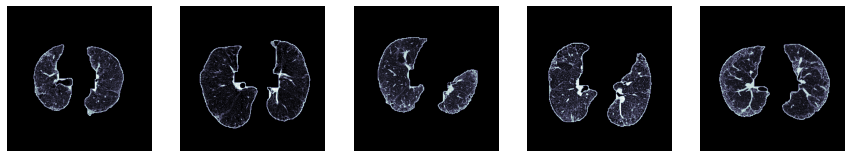

In [58]:
test = CTScansDataset(
    root_dir=test_dir,
    transform=transforms.Compose([
        CropBoundingBox(),
        ConvertToHU(),
        Resize(resize_dims),
        Clip(bounds=clip_bounds),
        MaskWatershed(min_hu=min(clip_bounds), iterations=1, show_tqdm=True),
        Normalize(bounds=clip_bounds)
    ]))

list_imgs = [test[i]['image'] for i in range(len(test))]
show(list_imgs)

code to preprocess and cache images in the disk is:

In [ ]:
%mkdir "model/cache_images"

/bin/bash: conda: command not found


In [ ]:
import gdcm

In [ ]:
!pip install -q pillow
# !pip install PyDrive

In [ ]:
data = CTScansDataset(
    root_dir=root_dir,
    transform=transforms.Compose([
        CropBoundingBox(),
        ConvertToHU(),
        Resize(resize_dims),
        Clip(bounds=clip_bounds),
        MaskWatershed(
            min_hu=min(clip_bounds),
            iterations=watershed_iterations,
            show_tqdm=False),
        Normalize(bounds=clip_bounds),
        ToTensor()
    ]))
# list_imgs = [test[i]['image'] for i in range(len(test))]

data.save("/content/drive/My Drive/Colab Data/OSIC/model/cache_images")

Saving pre-processed dataset to disk


Saving CT scan ID00077637202199102000916:  18%|█▊        | 32/176 [1:13:44<4:22:26, 109.35s/it]

In [ ]:
class CTTensorsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = Path(root_dir)
        self.tensor_files = sorted([f for f in self.root_dir.glob('*.pt')])
        self.transform = transform

    def __len__(self):
        return len(self.tensor_files)

    def __getitem__(self, item):
        if torch.is_tensor(item):
            item = item.tolist()

        image = torch.load(self.tensor_files[item])
        if self.transform:
            image = self.transform(image)

        return {
            'patient_id': self.tensor_files[item].stem,
            'image': image
        }

    def mean(self):
        cum = 0
        for i in range(len(self)):
            sample = self[i]['image']
            cum += torch.mean(sample).item()

        return cum / len(self)

    def random_split(self, val_size: float):
        num_val = int(val_size * len(self))
        num_train = len(self) - num_val
        return random_split(self, [num_train, num_val])

3.3.1. Checking data pipeline

In [ ]:
train = CTTensorsDataset(
    root_dir=root_dir,
    transform=ZeroCenter(pre_calculated_mean=pre_calculated_mean)
)
print(len(train))
cum = 0
for i in range(len(train)):
    sample = train[i]['image']
    cum += torch.mean(sample).item()

assert cum / len(train) == pytest.approx(0)